In [ ]:
import os, cv2, random, json

In [ ]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -o Input.jpg

In [ ]:
im = cv2.imread("/content/Input.jpg")
im

In [ ]:
# cv2.imshow(im)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import numpy as np

In [ ]:
np.array(im)

array(None, dtype=object)

In [ ]:
im

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]


In [ ]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train.shape,X_valid.shape, y_train.shape,y_valid.shape

((55000, 28, 28), (5000, 28, 28), (55000,), (5000,))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


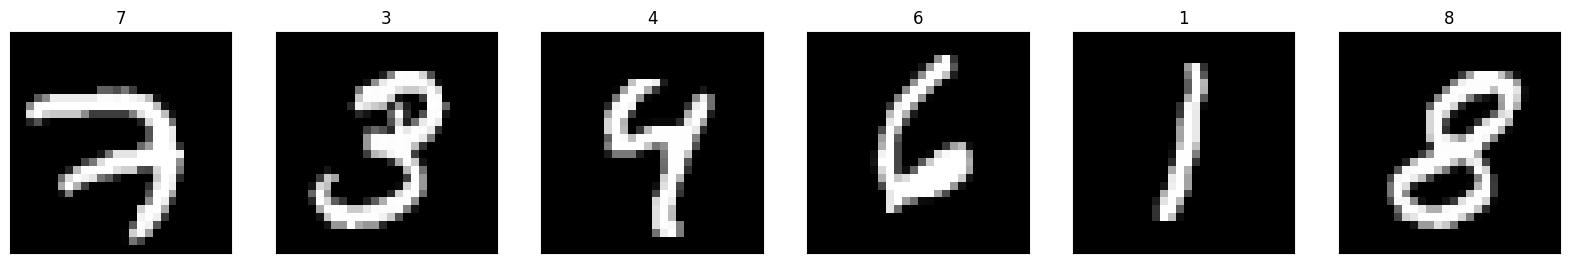

In [ ]:
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1,6,i+1, xticks = [], yticks = [])
    ax.imshow(X_train[i], cmap="gray")
    ax.set_title(str(y_train[i]))

In [ ]:
def visualize(img,ax):
    ax.imshow(img, cmap="gray")
    width, height = img.shape
    thresh = img.max()/2.5

    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy = (y,x),
                        horizontalalignment = "center",
                        verticalalignment = "center",
                        color = "white" if img[x][y] < thresh else "black")

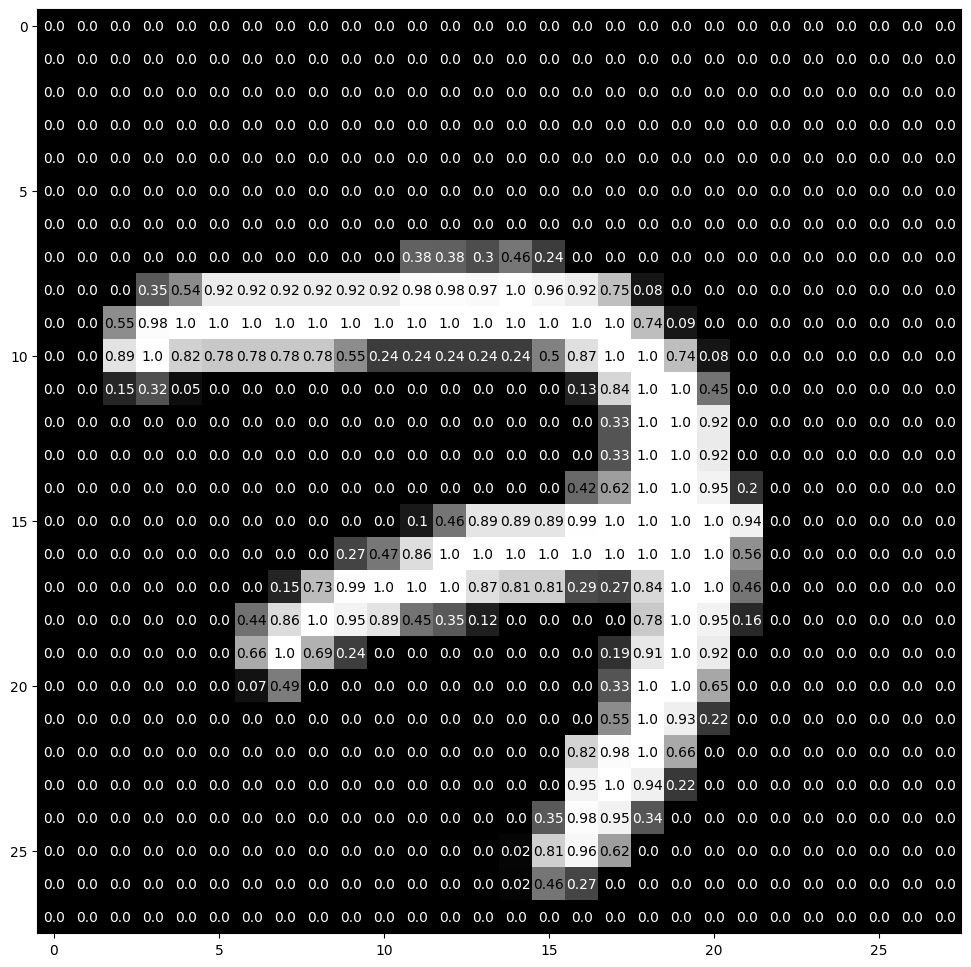

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize(X_train[0],ax)

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
X_test = X_test.astype("float32")/255

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
from keras.utils import to_categorical

In [ ]:
num_class = 10
y_train[:10]

array([7, 3, 4, 6, 1, 8, 1, 0, 9, 8], dtype=uint8)

In [ ]:
## convert to categorical
y_train = to_categorical(y_train, num_class)
y_test = to_categorical(y_test, num_class)
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
np.argmax(y_train,axis=1)[:10]

array([7, 3, 4, 6, 1, 8, 1, 0, 9, 8])

In [ ]:
## it is called categorical one hot encoding

In [ ]:
### Reshape data to fit our cnn


In [ ]:
X_train.shape[0]

55000

In [ ]:
img_row, img_columns = 28,28
X_train = X_train.reshape(X_train.shape[0],img_row,img_columns,1)
X_test = X_test.reshape(X_test.shape[0],img_row,img_columns,1)
input_shape = (img_row,img_columns,1)
print("X_train shape",X_train.shape)

X_train shape (55000, 28, 28, 1)


In [ ]:
## Define the model architecture

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2),padding="same"))

model.add(Conv2D(64,kernel_size=(3,3),padding = "same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

model.add(Flatten())

model.add(Dense(64,activation="relu"))

model.add(Dense(10,activation="softmax"))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/DeepLearning/CheckPoint'

In [ ]:
os.chdir("/content/drive/MyDrive")
os.getcwd()

'/content/drive/MyDrive'

In [ ]:
os.chdir("Colab Notebooks/DeepLearning")


In [ ]:
os.chdir("CheckPoint")
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/DeepLearning/CheckPoint'

In [ ]:
checkpointer = ModelCheckpoint("cnn1.model.weights.best.hdf5",verbose=1,save_best_only=True)

history = model.fit(X_train,y_train,batch_size = 64,epochs=10,validation_data= (X_test,y_test),callbacks=[checkpointer],verbose=2,shuffle= True)



Epoch 1/10

Epoch 1: val_loss improved from inf to 0.04602, saving model to cnn1.model.weights.best.hdf5
860/860 - 65s - loss: 0.1784 - accuracy: 0.9435 - val_loss: 0.0460 - val_accuracy: 0.9843 - 65s/epoch - 76ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.04602 to 0.03659, saving model to cnn1.model.weights.best.hdf5
860/860 - 62s - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.0366 - val_accuracy: 0.9875 - 62s/epoch - 72ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.03659 to 0.03014, saving model to cnn1.model.weights.best.hdf5
860/860 - 63s - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.0301 - val_accuracy: 0.9906 - 63s/epoch - 73ms/step
Epoch 4/10

Epoch 4: val_loss did not improve from 0.03014
860/860 - 60s - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.0311 - val_accuracy: 0.9898 - 60s/epoch - 70ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.03014 to 0.02667, saving model to cnn1.model.weights.best.hdf5
860/860 - 63s - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.0267 - val_accuracy: 0.9915 - 63s/epoch - 73ms/step
Epoch 6/10

Epoch 6: val_loss did not improve from 0.02667
860/860 - 62s - loss: 0.0140 - accuracy: 0.9959 - val_loss: 0.0297 - val_accuracy: 0.9913 - 62s/epoch - 72ms/s

In [ ]:
from keras.models import load_model

In [ ]:
modelnew = load_model("cnn1.model.weights.best.hdf5")


In [ ]:
X_train.shape

(55000, 28, 28, 1)

In [ ]:
X_valid.shape

(5000, 28, 28, 1)

In [ ]:
len(X_valid)

5000

In [ ]:
X_valid[0].reshape(28,28,1)
X_valid = X_valid.reshape(5000,28,28,1)
X_valid.shape

(5000, 28, 28, 1)

In [ ]:
y_train.shape

(55000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_valid.shape

(5000, 10)

In [ ]:
y_valid = to_categorical(y_valid,num_class)
y_valid

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
score = modelnew.evaluate(X_valid,y_valid,verbose=0)
accuracy = 100*score[1]
print("the accuracy is ",accuracy)

the accuracy is  98.91999959945679


In [ ]:
# model.predict(X_test[0])

In [ ]:
X_eve = X_test[0]

In [ ]:
X_test[0].shape

(28, 28, 1)

In [ ]:
X_eve = X_eve.reshape(1,28,28,1)

In [ ]:
out = model.predict(X_eve)

1/1 [==============================] - 0s 60ms/step


In [ ]:
np.argmax(out)

7

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
np.argmax(y_test[0])

7

In [ ]:
import tensorflow
from keras.datasets import cifar10

In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
X_valid, X_train = X_train[:5000]/255 , X_train[5000:]/255
y_valid, y_train = y_train[:5000] , y_train[5000:]

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((45000, 32, 32, 3), (45000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
X_valid.shape, y_valid.shape

((5000, 32, 32, 3), (5000, 1))

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train

array([[6],
       [7],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
X_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [ ]:
X_train

array([[[[0.23529412, 0.32156863, 0.21176471],
         [0.15686275, 0.26666667, 0.14117647],
         [0.20392157, 0.31764706, 0.20392157],
         ...,
         [0.20784314, 0.16862745, 0.19607843],
         [0.25882353, 0.21568627, 0.23921569],
         [0.28627451, 0.24313725, 0.26666667]],

        [[0.43921569, 0.44705882, 0.44705882],
         [0.22745098, 0.27843137, 0.21960784],
         [0.22745098, 0.31764706, 0.20784314],
         ...,
         [0.21176471, 0.18431373, 0.20784314],
         [0.2627451 , 0.22745098, 0.25490196],
         [0.28235294, 0.24313725, 0.27058824]],

        [[0.66666667, 0.63137255, 0.69803922],
         [0.46666667, 0.4627451 , 0.47058824],
         [0.31372549, 0.34901961, 0.29019608],
         ...,
         [0.21960784, 0.19607843, 0.21960784],
         [0.2745098 , 0.24705882, 0.2745098 ],
         [0.28235294, 0.25098039, 0.27843137]],

        ...,

        [[0.35686275, 0.44313725, 0.36862745],
         [0.23137255, 0.3254902 , 0.24313725]

In [ ]:
X_test = X_test/255
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [ ]:
X_train.shape

(45000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
import numpy as np

In [ ]:
numClass = len(np.unique(y_train))
numClass

10

In [ ]:
y_train = to_categorical(y_train, numClass)
y_test = to_categorical(y_test, numClass)
y_train, y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]], dtype=float32))

In [ ]:
y_valid = to_categorical(y_valid)
y_valid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape, X_test.shape, X_valid.shape

((45000, 32, 32, 3), (10000, 32, 32, 3), (5000, 32, 32, 3))

In [ ]:
from keras.layers import Dense, Flatten, MaxPool2D, Conv2D, Dropout
from keras import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=3,padding ="same",activation="relu",input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size =2))
model.add(Conv2D(filters=32,kernel_size=3,padding ="same",activation="relu"))
model.add(MaxPool2D(pool_size =2))
model.add(Conv2D(filters=64,kernel_size=3,padding ="same",activation="relu"))
model.add(MaxPool2D(pool_size =2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10,activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 64)         

In [ ]:
model.compile(loss = "categorical_crossentropy",optimizer = "rmsprop",metrics=["accuracy"])

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint = ModelCheckpoint("model.keras.RBGIMAGE.h5",verbose=1,save_best_only=True)
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size = 64,callbacks=[checkpoint],epochs=3,verbose=1,shuffle=True)

Epoch 1/3
703/704 [============================>.] - ETA: 0s - loss: 1.6859 - accuracy: 0.3856
Epoch 1: val_loss improved from inf to 1.36964, saving model to model.keras.RBGIMAGE.h5
704/704 [==============================] - 59s 82ms/step - loss: 1.6858 - accuracy: 0.3856 - val_loss: 1.3696 - val_accuracy: 0.5076
Epoch 2/3
  2/704 [..............................] - ETA: 44s - loss: 1.5841 - accuracy: 0.4453

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


703/704 [============================>.] - ETA: 0s - loss: 1.3167 - accuracy: 0.5299
Epoch 2: val_loss improved from 1.36964 to 1.29054, saving model to model.keras.RBGIMAGE.h5
704/704 [==============================] - 55s 79ms/step - loss: 1.3167 - accuracy: 0.5298 - val_loss: 1.2905 - val_accuracy: 0.5326
Epoch 3/3
703/704 [============================>.] - ETA: 0s - loss: 1.1583 - accuracy: 0.5901
Epoch 3: val_loss improved from 1.29054 to 1.16594, saving model to model.keras.RBGIMAGE.h5
704/704 [==============================] - 57s 80ms/step - loss: 1.1582 - accuracy: 0.5901 - val_loss: 1.1659 - val_accuracy: 0.5906


In [ ]:
from keras.models import load_model

In [ ]:
modelnew = load_model("model.keras.RBGIMAGE.h5")

In [ ]:
out = modelnew.predict(X_test)

313/313 [==============================] - 5s 17ms/step


In [ ]:
np.argmax(out[0])

3

In [ ]:
np.argmax(y_test[0])

3

In [ ]:
score = modelnew.evaluate(X_test,y_test,verbose=0)
score

[1.1739506721496582, 0.583299994468689]

In [ ]:
score[1]*100

58.3299994468689

In [ ]:
## Accuracy = score[1]*100